In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
from torchvision.models import mobilenet_v2
import torchvision.transforms as transforms
from torchvision.utils import make_grid

In [2]:
## Defining a transform ##

trans = transforms.Compose([transforms.Resize((64 , 64)),
                           transforms.ToTensor()])

## Loading the dataset ##

monkey_dataset = ImageFolder(root = 'training',
                             transform = trans)  ##Dataset Creation ##

(input1 , label1)
...

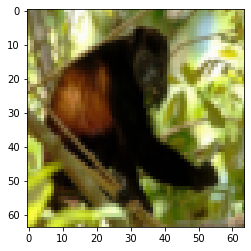

In [3]:
## 1st input ##

plt.imshow(monkey_dataset[0][0].permute(1,2,0))
plt.show()

In [4]:
print('Number of Images :' , len(monkey_dataset))

print('Image Size :' , monkey_dataset[0][0].shape)

print('Label :' , monkey_dataset[0][1])

print('Maximum Value :' , torch.max(monkey_dataset[0][0]))

print('Minimum Value :' , torch.min(monkey_dataset[0][0]))

Number of Images : 1097
Image Size : torch.Size([3, 64, 64])
Label : 0
Maximum Value : tensor(0.9922)
Minimum Value : tensor(0.)


In [5]:
monkey_dataloader = DataLoader(monkey_dataset,
                               batch_size = 64,
                               shuffle = True)


In [6]:
print('Number of batches :' ,len(monkey_dataloader))

Number of batches : 18


In [7]:
def check_cuda():
    if torch.cuda.is_available():
        return torch.device('cuda')
    return torch.device('cpu')

def transfer_data(data , device):
    if isinstance(data , (tuple , list)):
        return [transfer_data(each_data , device) for each_data in data]
    return data.to(device)

In [8]:
class gpu_dataloader():
    def __init__(self , dl , device):
        self.dl = dl
        self.device = device
    
    def __iter__(self):
        for batch in self.dl:
            yield transfer_data(batch , self.device)
    
    def __len__(self):
        return len(self.dl)

In [9]:
device = check_cuda()
monkey_dl = gpu_dataloader(monkey_dataloader,device)

In [10]:
print('Length of the GPU dataloader:',len(monkey_dl))

Length of the GPU dataloader: 18


In [11]:
base_model = mobilenet_v2(pretrained = True)

In [12]:
def accuracy(pred , target):
    actual = torch.argmax(pred , dim = 1)
    num = (torch.sum(actual == target)).item()
    den = pred.numel()
    return num / den

In [13]:
pre_model = mobilenet_v2(pretrained = True)

In [14]:
pre_model.classifier = nn.Sequential(
    nn.Linear(1280 , 500),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(500 , 10))
print(pre_model)

MobileNetV2(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momen

In [15]:
criterion = nn.functional.cross_entropy

optim = torch.optim.Adam(pre_model.parameters() , lr = 0.001)

In [17]:
base_model.classifier = nn.Sequential(
    nn.Linear(1280 , 500),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(500 , 10))
print(base_model)

MobileNetV2(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momen